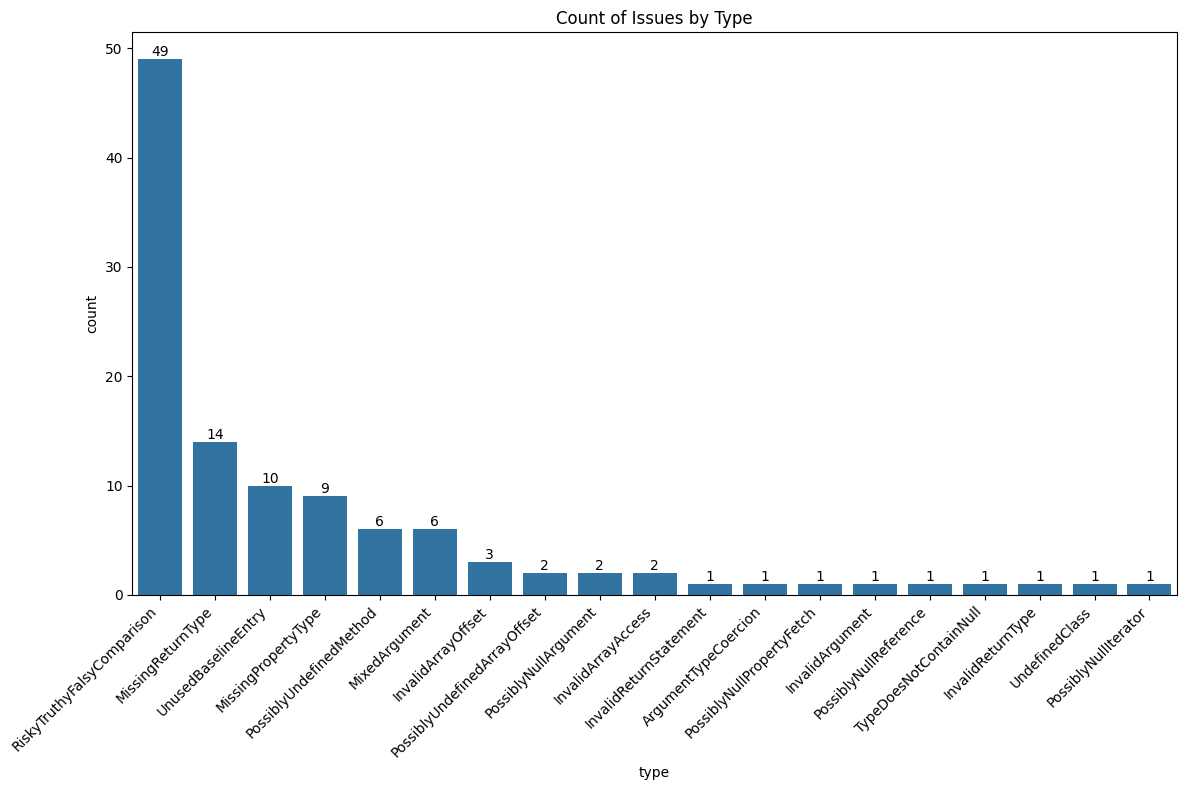

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Load the JSON report
with open('./psalm-report.json') as f:
    report = json.load(f)

# Extracting issues from the report
issues = []

# Loop through each issue in the report and only keep the the ERROR type
for issue in report:
     if issue['severity'] == 'error':
        issues.append({
            'file': issue.get('file_name'),
            'line': issue.get('line_from'),
            'message': issue.get('message'),
            'type': issue.get('type'),
        })

# Create a DataFrame from the issues list
issues_df = pd.DataFrame(issues)

# Create a summary dictionary to hold the data
summary = {}

# Iterate through the issues to populate the summary
for _, row in issues_df.iterrows():
    issue_type = row['type']
    file_name = row['file']
    line_number = row['line']

    # Initialize the entry if it doesn't exist
    if issue_type not in summary:
        summary[issue_type] = {
            'count': 0,
            'files': []
        }

    # Increment the count and append the file info
    summary[issue_type]['count'] += 1
    summary[issue_type]['files'].append(f"{file_name}:{line_number}")  # Format: file_name:line_number

# Modify the files link to create collapsible sections (adjust the base path as needed)
base_path = "file:///Users/sebastien/Documents/Repositories/JAWS_Project/jaws/"  # Adjust this path

summary_data = []
for issue_type, data in summary.items():
    # Create a collapsible section for files
    files_list = '<br>'.join([f'<a href="{base_path}{file_name.split(":")[0]}">{file_name}</a>' for file_name in data['files']])
    collapsible_files = f'''
    <details>
        <summary>{len(data['files'])} files</summary>
        {files_list}
    </details>
    '''
    summary_data.append({
        'Type': issue_type,
        'Count': data['count'],
        'Files': collapsible_files
    })

# Create the summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame as HTML
display(HTML(summary_df.to_html(escape=False)))

# Visualization of issues count by type
plt.figure(figsize=(12, 8))  # Increased figure size
ax = sns.countplot(data=issues_df, x='type', order=issues_df['type'].value_counts().index)
plt.title('Count of Issues by Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')  # Center and place above the bar

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
